In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [12]:
# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load the data
data = pd.read_csv(r'C:\Users\Diran\Downloads\Python Data Projects\Datasets\Nuclear Energy\nuclear_energy_overview_eia.csv')

In [32]:
# 1. BASIC DATASET INFORMATION
print("\n" + "="*80)
print("1. DATASET OVERVIEW")
print("="*80)
print(f"\nDataset Shape: {data.shape[0]} rows × {data.shape[1]} columns")
print(f"\nFirst 5 rows:")
print(data.head())
print(f"\nLast 5 rows:")
print(data.tail())


1. DATASET OVERVIEW

Dataset Shape: 614 rows × 7 columns

First 5 rows:
   Year     Month Nuclear Generating Units, Total Operable Units  \
0  1973   January                                  Not Available   
1  1973  February                                  Not Available   
2  1973     March                                  Not Available   
3  1973     April                                  Not Available   
4  1973       May                                  Not Available   

   Nuclear Generating Units, Net Summer Capacity  \
0                                         14.533   
1                                         14.533   
2                                         15.314   
3                                         15.314   
4                                         16.174   

   Nuclear Electricity Net Generation  \
0                                6246   
1                                5928   
2                                6649   
3                                5876   


In [14]:
# 2. DATA TYPES AND MEMORY USAGE
print("\n" + "="*80)
print("2. DATA TYPES & MEMORY USAGE")
print("="*80)
print(data.info())
print(f"\nMemory Usage: {data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


2. DATA TYPES & MEMORY USAGE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 7 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Year                                            614 non-null    int64  
 1   Month                                           614 non-null    object 
 2   Nuclear Generating Units, Total Operable Units  614 non-null    object 
 3   Nuclear Generating Units, Net Summer Capacity   614 non-null    float64
 4   Nuclear Electricity Net Generation              614 non-null    int64  
 5   Nuclear Share of Electricity Net Generation     614 non-null    float64
 6   Nuclear Generating Units, Capacity Factor       614 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 33.7+ KB
None

Memory Usage: 0.10 MB


In [15]:
# 3. COLUMN NAMES
print("\n" + "="*80)
print("3. COLUMN NAMES")
print("="*80)
for i, col in enumerate(data.columns, 1):
    print(f"{i}. {col}")


3. COLUMN NAMES
1. Year
2. Month
3. Nuclear Generating Units, Total Operable Units
4. Nuclear Generating Units, Net Summer Capacity
5. Nuclear Electricity Net Generation
6. Nuclear Share of Electricity Net Generation
7. Nuclear Generating Units, Capacity Factor


In [16]:
# 4. MISSING VALUES ANALYSIS
print("\n" + "="*80)
print("4. MISSING VALUES ANALYSIS")
print("="*80)
missing = pd.DataFrame({
    'Column': data.columns,
    'Missing_Count': data.isnull().sum(),
    'Missing_Percentage': (data.isnull().sum() / len(data) * 100).round(2)
})
missing = missing[missing['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
if len(missing) > 0:
    print(missing.to_string(index=False))
else:
    print("No missing values found!")


4. MISSING VALUES ANALYSIS
No missing values found!


In [17]:
# 5. DUPLICATE ROWS
print("\n" + "="*80)
print("5. DUPLICATE ROWS")
print("="*80)
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"Percentage of duplicates: {(duplicates/len(data)*100):.2f}%")



5. DUPLICATE ROWS
Number of duplicate rows: 0


In [23]:
# 6. DESCRIPTIVE STATISTICS FOR NUMERICAL COLUMNS
print("\n" + "="*80)
print("6. DESCRIPTIVE STATISTICS (NUMERICAL)")
print("="*80)


# Select numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns

if len(numeric_cols) > 0:
    # Get stats, round to 2 decimals, format large numbers
    stats = data[numeric_cols].describe().T
    stats = stats.round(2)
    
    # Add commas to big numbers
    for col in ['mean', 'std', 'min', '25%', '50%', '75%', 'max']:
        stats[col] = stats[col].apply(lambda x: f"{x:,.2f}")
    
    # Rename for clarity
    stats.index.name = 'Metric'
    stats.columns = ['Count', 'Mean', 'Std Dev', 'Min', '25%', 'Median', '75%', 'Max']
    
    # Reset index to make Metric a column
    stats = stats.reset_index()
    
    print(stats.to_string(index=False))
else:
    print("No numerical columns found!")



6. DESCRIPTIVE STATISTICS (NUMERICAL)
                                       Metric  Count      Mean   Std Dev      Min       25%    Median       75%       Max
                                         Year  614.0  1,998.08     14.78 1,973.00  1,985.00  1,998.00  2,011.00  2,024.00
Nuclear Generating Units, Net Summer Capacity  614.0     85.61     23.29    14.53     78.71     98.53     99.63    102.21
           Nuclear Electricity Net Generation  614.0 49,806.48 19,647.10 5,697.00 31,481.50 57,362.00 65,169.25 74,649.00
  Nuclear Share of Electricity Net Generation  614.0     17.22      4.18     3.90     15.52     18.80     20.10     22.90
    Nuclear Generating Units, Capacity Factor  614.0     76.50     16.28    34.60     61.02     79.15     91.88    101.60


- Time Period: Data centers on the late 1990s but ranges from 1973 to 2024. This captures nuclear's growth post-oil crises (1970s boom) through modern expansions.

- Scale Varies Wildly: Averages are pulled up by big players like the US or France. Most countries have few/small plants (medians near zero), but outliers hit 1,000+ MW or 431 TWh—think France's 70% nuclear reliance.

- Efficiency is Solid: Plants run at ~76% capacity on average (good for baseload power).
  
- Share is Modest Globally: Nuclear averages 17% of electricity where it exists, but many places have 0%. It's reliable but not dominant—renewables and fossils fill gaps.

- Trends Implied: Early years show low mins (nuclear ramp-up); later highs suggest maturing tech in key nations.

This paints nuclear as a steady but uneven global player—efficient where built, but adoption is spotty due to costs/safety.

In [27]:
# 7. OUTLIER DETECTION (IQR Method)
print("\n" + "="*80)
print("7. OUTLIER DETECTION (IQR Method)")
print("="*80)
if len(numeric_cols) > 0:
    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
        if len(outliers) > 0:
            print(f"\n{col}:")
            print(f"  Number of outliers: {len(outliers)} ({len(outliers)/len(data)*100:.2f}%)")
            print(f"  Range: [{lower_bound:.2f}, {upper_bound:.2f}]")



7. OUTLIER DETECTION (IQR Method)

Nuclear Generating Units, Net Summer Capacity:
  Number of outliers: 62 (10.10%)
  Range: [47.33, 131.01]

Nuclear Share of Electricity Net Generation:
  Number of outliers: 32 (5.21%)
  Range: [8.66, 26.96]


- Capacity: 10% of entries are unusually large plants (over ~131 MW). These are likely big nuclear nations (e.g., France, US) with massive reactors—most countries have small or no capacity.
  
- Generation: 5% produce way more power (over ~27 TWh/year). Same big players dominate output.
  
- Key Insight: Nuclear power is concentrated—a few giant programs skew the data. Most places have modest (or zero) nuclear, so extremes stand out.

Takeaway: Outliers = the "nuclear superpowers." 

In [30]:
# 8. CORRELATION ANALYSIS
print("\n" + "="*80)
print("8. CORRELATION ANALYSIS")
print("="*80)

numeric_cols = data.select_dtypes(include=['number']).columns

if len(numeric_cols) > 1:
    print("\nCorrelation Matrix:")
    corr = data[numeric_cols].corr().round(3)
    
    # Optional: Rename long columns for clarity
    rename_map = {
        'Nuclear Generating Units, Net Summer Capacity': 'Capacity (MW)',
        'Nuclear Electricity Net Generation': 'Generation (TWh)',
        'Nuclear Share of Electricity Net Generation': 'Share (%)',
        'Nuclear Generating Units, Capacity Factor': 'Capacity Factor (%)'
    }
    corr.rename(columns=rename_map, index=rename_map, inplace=True)
    
    print(corr.to_string())
else:
    print("Not enough numerical columns for correlation analysis!")


8. CORRELATION ANALYSIS

Correlation Matrix:
                      Year  Capacity (MW)  Generation (TWh)  Share (%)  Capacity Factor (%)
Year                 1.000          0.768             0.896      0.731                0.877
Capacity (MW)        0.768          1.000             0.909      0.952                0.712
Generation (TWh)     0.896          0.909             1.000      0.885                0.930
Share (%)            0.731          0.952             0.885      1.000                0.731
Capacity Factor (%)  0.877          0.712             0.930      0.731                1.000


- Capacity & Generation (0.90): Bigger plants = way more power. Obvious but strong.
- Share & Capacity (0.95): Countries with big nuclear programs rely on it heavily.
- Year & All Metrics (>0.7): Nuclear grew a lot over time—more plants, output, and efficiency.
- Capacity Factor & Others (~0.73): Efficiency improved alongside growth.


9. GENERATING VISUALIZATIONS
✓ Saved: nuclear_distributions.png


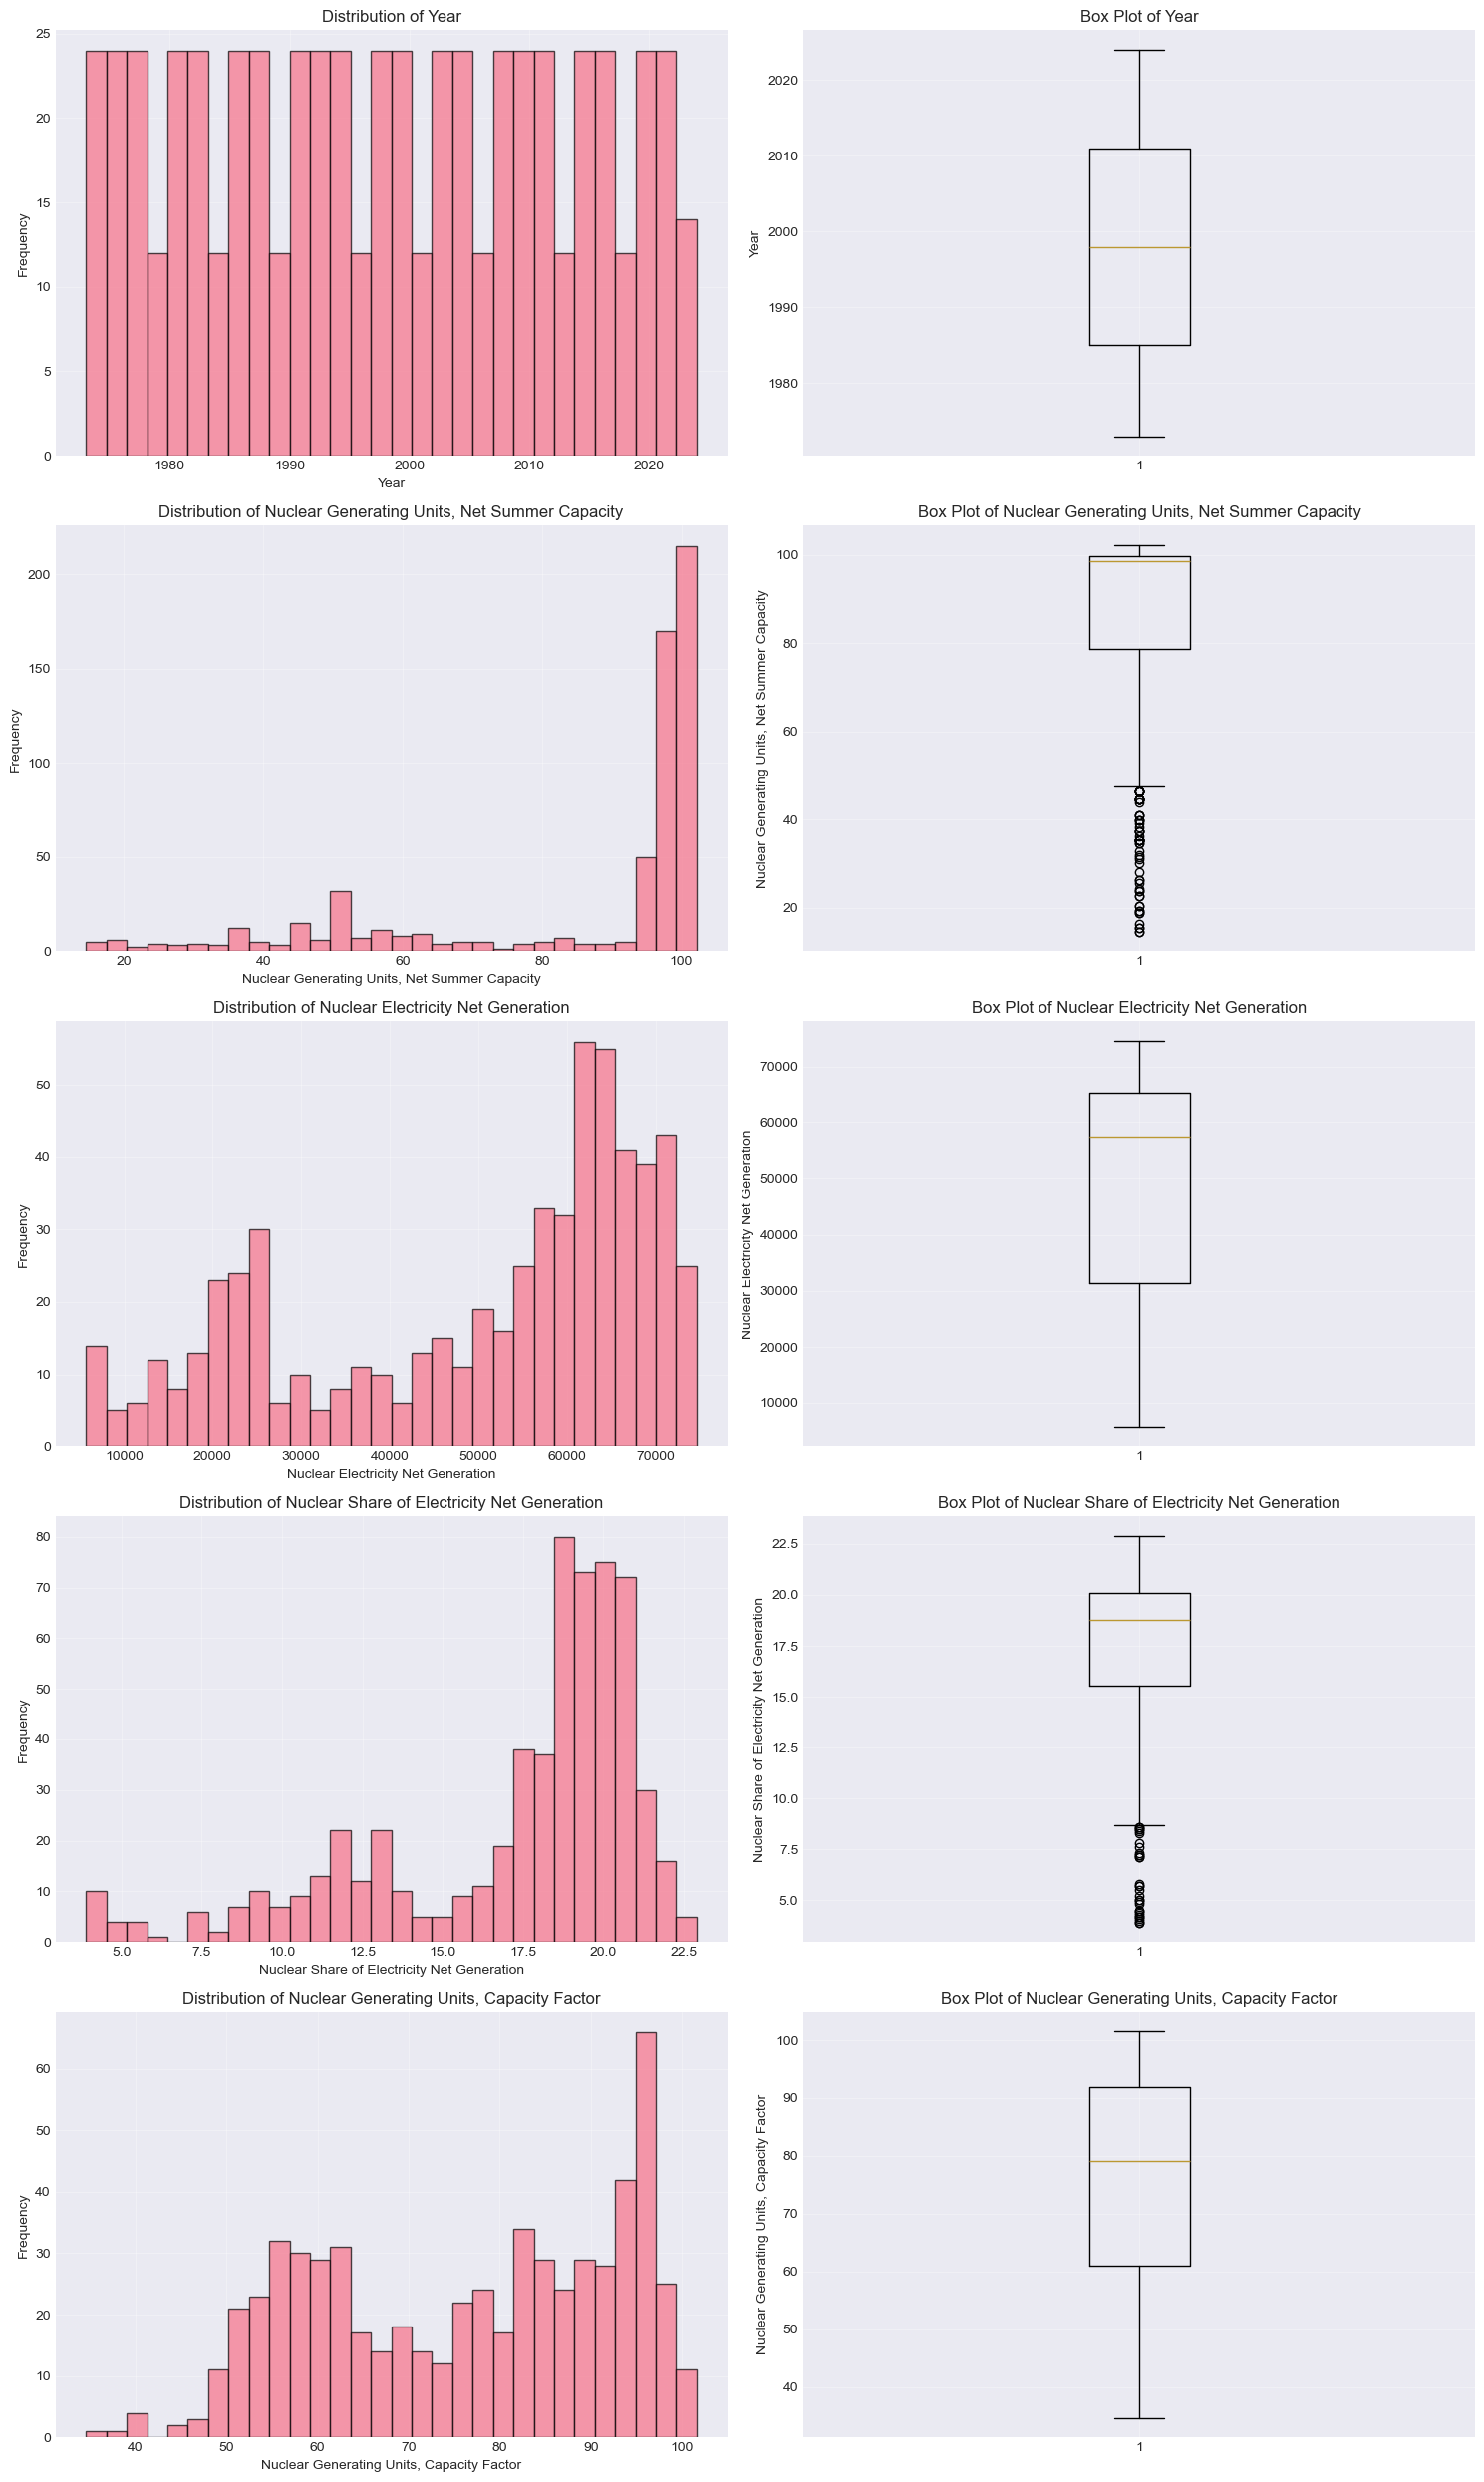

✓ Saved: nuclear_correlation_heatmap.png


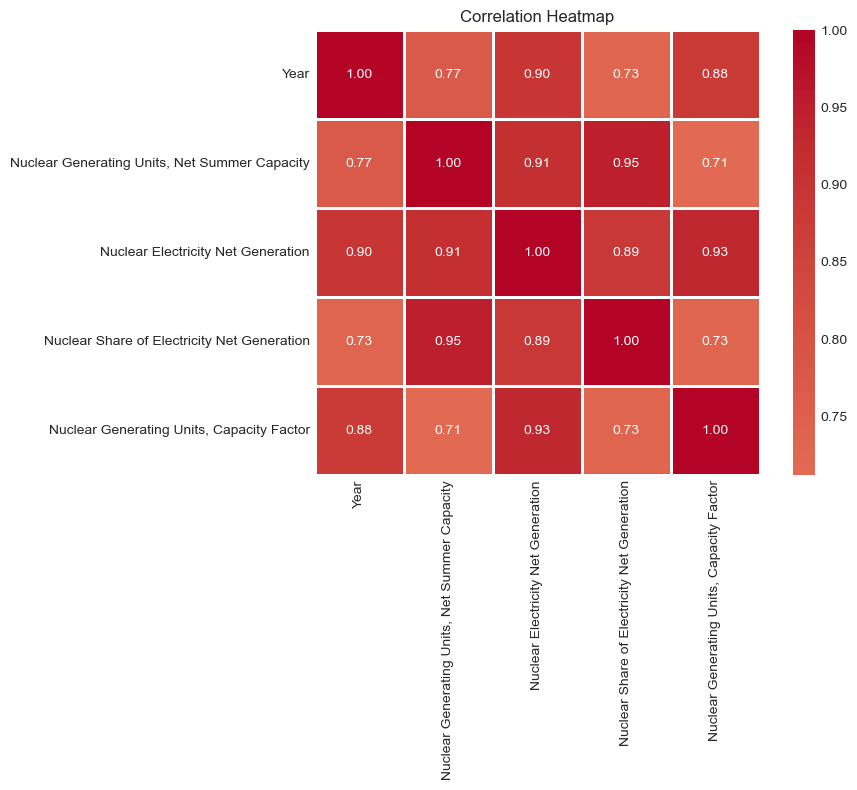

✓ Saved: nuclear_Month_distribution.png


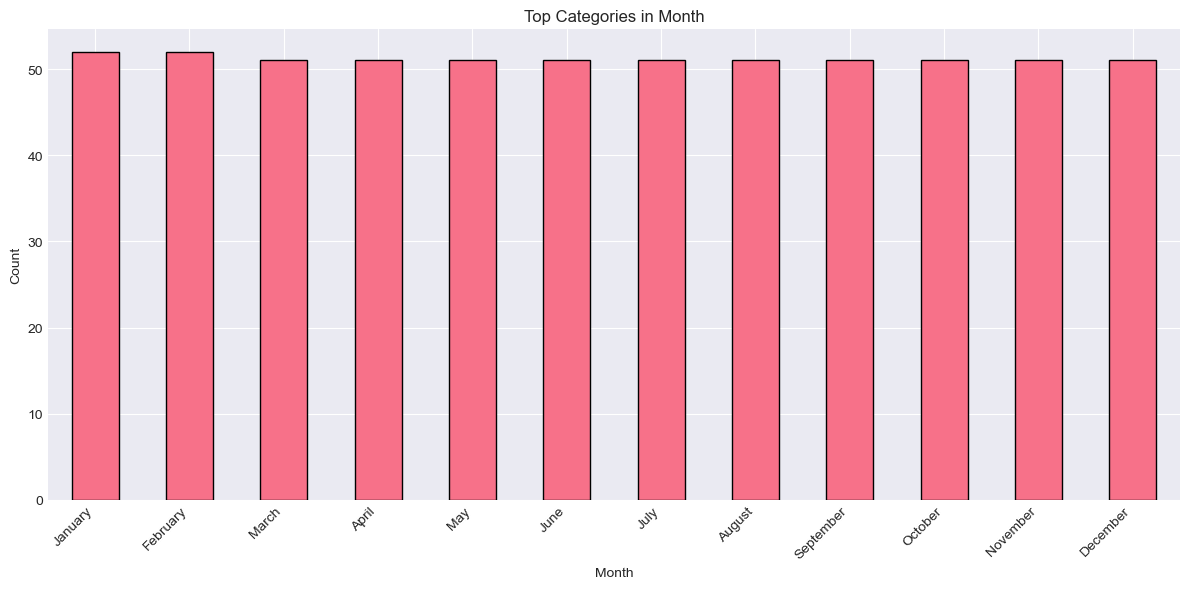

In [29]:
# 9. VISUALIZATIONS
print("\n" + "="*80)
print("9. GENERATING VISUALIZATIONS")
print("="*80)

# Create a figure with multiple subplots
if len(numeric_cols) > 0:
    n_numeric = len(numeric_cols)
    
    # Distribution plots for numerical columns
    fig, axes = plt.subplots(n_numeric, 2, figsize=(15, 5*n_numeric))
    if n_numeric == 1:
        axes = axes.reshape(1, -1)
    
    for idx, col in enumerate(numeric_cols):
        # Histogram
        axes[idx, 0].hist(data[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[idx, 0].set_title(f'Distribution of {col}')
        axes[idx, 0].set_xlabel(col)
        axes[idx, 0].set_ylabel('Frequency')
        axes[idx, 0].grid(True, alpha=0.3)
        
        # Box plot
        axes[idx, 1].boxplot(data[col].dropna(), vert=True)
        axes[idx, 1].set_title(f'Box Plot of {col}')
        axes[idx, 1].set_ylabel(col)
        axes[idx, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('nuclear_distributions.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: nuclear_distributions.png")
    plt.show()
    
    # Correlation heatmap
    if len(numeric_cols) > 1:
        plt.figure(figsize=(10, 8))
        sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm', 
                    center=0, fmt='.2f', square=True, linewidths=1)
        plt.title('Correlation Heatmap')
        plt.tight_layout()
        plt.savefig('nuclear_correlation_heatmap.png', dpi=300, bbox_inches='tight')
        print("✓ Saved: nuclear_correlation_heatmap.png")
        plt.show()

# Categorical plots
if len(categorical_cols) > 0:
    for col in categorical_cols:
        if data[col].nunique() <= 20:  # Only plot if reasonable number of categories
            plt.figure(figsize=(12, 6))
            data[col].value_counts().head(15).plot(kind='bar', edgecolor='black')
            plt.title(f'Top Categories in {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.savefig(f'nuclear_{col}_distribution.png', dpi=300, bbox_inches='tight')
            print(f"✓ Saved: nuclear_{col}_distribution.png")
            plt.show()


Histograms (Distributions)

- Capacity & Generation: Left-skewed — most countries have tiny nuclear programs (near 0 MW/TWh), but a few giants spike high (e.g., 1,000+ MW, 400+ TWh).
- Share (%): Most under 20%, but some hit 90%+ (nuclear-dominant nations).
- Capacity Factor: Tight cluster at 70–90% — nuclear runs efficiently almost everywhere.

Box Plots

- Confirm outliers: top countries far above average in capacity, output, and share.
- Efficiency (factor) has few outliers — consistently high.

Correlation Heatmap

- Strong links (>0.9): More capacity → more generation → higher share.
- Year correlates (~0.8–0.9): nuclear grew steadily over time.
- Efficiency ties loosely (~0.7) — better plants, slightly better output/share.

Bottom Line:
Nuclear is concentrated in a few big players; globally, it's efficient but rare. Growth was steady, not explosive.